# Double check IDEA PID info

I'm just loading an IDEA file to double check that there is the PID information. 

In [2]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
#path = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/fastsim_2mio_total_SaraTagging/IDEA/training/Hbb.root" #IDEA
path = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/fastsim_2mio_total_SaraTagging/CLD/training/Hbb.root" # CLD

file = uproot.open(path)
tree = file["tree;1"]

df = tree.arrays(library="np", entry_start=0, entry_stop=3800)

In [4]:
df.keys()


dict_keys(['recojet_isG', 'recojet_isS', 'recojet_isC', 'recojet_isB', 'recojet_isTAU', 'recojet_isU', 'recojet_isD', 'jet_p', 'jet_e', 'jet_mass', 'jet_phi', 'jet_theta', 'jet_nconst', 'jet_nmu', 'jet_nel', 'jet_nchad', 'jet_ngamma', 'jet_nnhad', 'jet_npfcand', 'pfcand_erel_log', 'pfcand_thetarel', 'pfcand_phirel', 'pfcand_dptdpt', 'pfcand_detadeta', 'pfcand_dphidphi', 'pfcand_dxydxy', 'pfcand_dzdz', 'pfcand_dxydz', 'pfcand_dphidxy', 'pfcand_dlambdadz', 'pfcand_dxyc', 'pfcand_dxyctgtheta', 'pfcand_phic', 'pfcand_phidz', 'pfcand_phictgtheta', 'pfcand_cdz', 'pfcand_cctgtheta', 'pfcand_mtof', 'pfcand_dndx', 'pfcand_charge', 'pfcand_isMu', 'pfcand_isEl', 'pfcand_isChargedHad', 'pfcand_isGamma', 'pfcand_isNeutralHad', 'pfcand_type', 'pfcand_dxy', 'pfcand_dz', 'pfcand_btagSip2dVal', 'pfcand_btagSip2dSig', 'pfcand_btagSip3dVal', 'pfcand_btagSip3dSig', 'pfcand_btagJetDistVal', 'pfcand_btagJetDistSig', 'pfcand_e', 'pfcand_p', 'pfcand_theta', 'pfcand_phi'])

In [5]:
tof = df['pfcand_mtof']
dndx = df['pfcand_dndx']

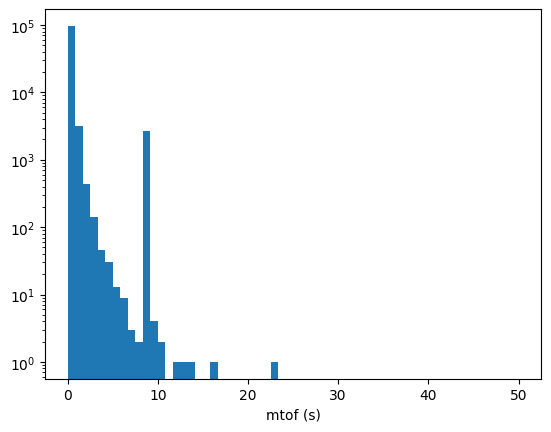

In [6]:
plt.hist(np.concatenate(tof), bins=60, range=[0, 50])
plt.yscale("log")
plt.xlabel(r"mtof (s)")
plt.show()

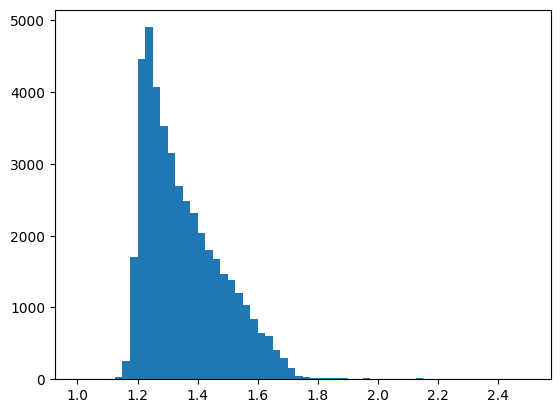

In [7]:
plt.hist(np.concatenate(dndx), bins=60, range=[1, 2.5])
plt.show()


## Check mass? 

In [13]:
p = np.concatenate(df['pfcand_p'])
E = np.concatenate(df['pfcand_e'])
pid = np.concatenate(df['pfcand_type'])
m = np.sqrt(E**2 - p**2)

/tmp/ipykernel_2011354/4267914155.py:4: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(E**2 - p**2)


In [11]:
np.unique(pid)

array([  0.,  22., 130.], dtype=float32)

In [12]:
i_cpart = np.where(pid==0)
i_gamma = np.where(pid==22)
i_nhad = np.where(pid==130)

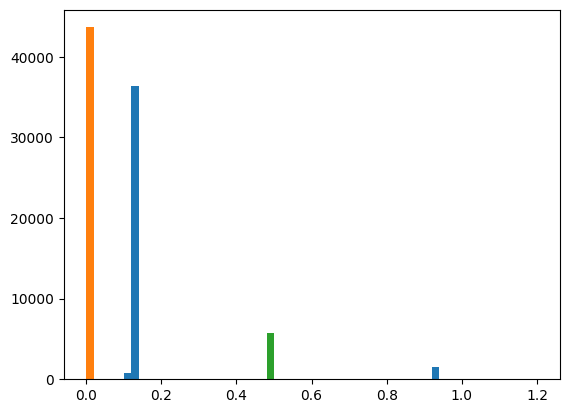

In [15]:
for i in [i_cpart, i_gamma, i_nhad]:
    plt.hist(m[i], bins=60, range=[0, 1.2])
plt.show()

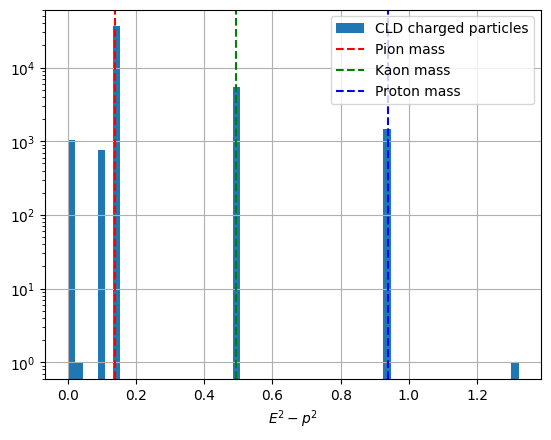

In [22]:

# Particle masses in GeV/c^2
pion_mass = 0.13957  # GeV/c^2
kaon_mass = 0.49367  # GeV/c^2
proton_mass = 0.93827  # GeV/c^2

plt.hist(m[i_cpart], label="CLD charged particles", bins=60)
plt.yscale("log")
plt.grid()

# Add vertical lines for pion, kaon, and proton masses
plt.axvline(pion_mass, color='r', linestyle='--', label='Pion mass')
plt.axvline(kaon_mass, color='g', linestyle='--', label='Kaon mass')
plt.axvline(proton_mass, color='b', linestyle='--', label='Proton mass')

plt.xlabel(r"$E^2 - p^2$")
plt.legend()
plt.show()

In [23]:
df['pfcand_pid']

KeyError: 'pfcand_pid'